# QPSK
---
Estudiante: Amallo, Sofía

En QPSK se usan dos bits para formar cada símbolo, con $2^2=4$ posibles combinaciones. La salida del modulador es la portadora con una fase de entre cuatro posibles valores ($00, 01, 10, 11$) durante el tiempo de duración de símbolo.

In [1]:
# librerías a usar
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#Reference: https://www.gaussianwaves.com/2015/06/how-to-generate-awgn-noise-in-matlaboctave-without-using-in-built-awgn-function/
from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal

def awgn(s,SNRdB,L=1):
    """
    AWGN channel
    Add AWGN noise to input signal. The function adds AWGN noise vector to signal 's' to generate a resulting signal vector 'r' of specified 
    SNR in dB. It also returns the noise vector 'n' that is added to the signal 's' and the power spectral density N0 of noise added
    Parameters:
        s : input/transmitted signal vector
        SNRdB : desired signal to noise ratio (expressed in dB) for the received signal
        L : oversampling factor (applicable for waveform simulation) default L = 1.
    Returns:
        r : received signal vector (r=s+n)
    """
    gamma = 10**(SNRdB/10) #SNR to linear scale
    if s.ndim==1:# if s is single dimensional vector
        P=L*sum(abs(s)**2)/len(s) #Actual power in the vector
    else: # multi-dimensional signals like MFSK
        P=L*sum(sum(abs(s)**2))/len(s) # if s is a matrix [MxN]
    N0=P/gamma # Find the noise spectral density
    if isrealobj(s):# check if input is real/complex object type
        n = sqrt(N0/2)*standard_normal(s.shape) # computed noise
    else:
        n = sqrt(N0/2)*(standard_normal(s.shape)+1j*standard_normal(s.shape))
    r = s + n # received signal
    return r, n

### Relación entre bits, samples y símbolos:

<p align="center">

$\frac{samples}{second} \times \frac{symbols}{sample} \times \frac{bits}{symbol} = \frac{bits}{second}$
</p>

- Sample: es el resultado de muestrear una señal continua en el tiempo obteniendo una representación discreta de la misma. El teorema de Nyquist-Shannon nos dice que la frecuencia de muestreo debe ser de, al menos, el doble de la frecuencia de la señal muestreada para que dicha señal pueda ser reconstruida. 
- Simbolo: es una forma de onda, un estado o una condición del canal de comunicación que persiste en un periodo fijo de tiempo. Un transmisor envía simbolos a una tasa conocida, y el receptor tiene el trabajo de detectar la secuencia de símbolos con el objetivo de reconstruir la información.

In [3]:
#Fs = 100  # 100[Hz] sampling frec [samples/sec]
bps = 2  # bits per symbol
sample_rate = 800 #[Hz] samples per second
sampling_period = 1/sample_rate  # [s] time between samples
sps = 8  # [samples/symbol] cantidad de samples por simbolo
N = 4000   # [bits] cantidad de bits a transmitir
Nsym = int(N/bps)  # [symbols] cantidad de simbolos que tomamos en total
symbol_period = sampling_period*sps  # [s] periodo de cada simbolo

print("Cantidad de samples: ", N, "\nCantidad de simbolos: ", Nsym)

Cantidad de samples:  4000 
Cantidad de simbolos:  2000


# Transmisor

![diagramabloqueqpsk](https://github.com/sofia-am/digital_communications/blob/master/img/diagramabloqueqpsk.png?raw=true)



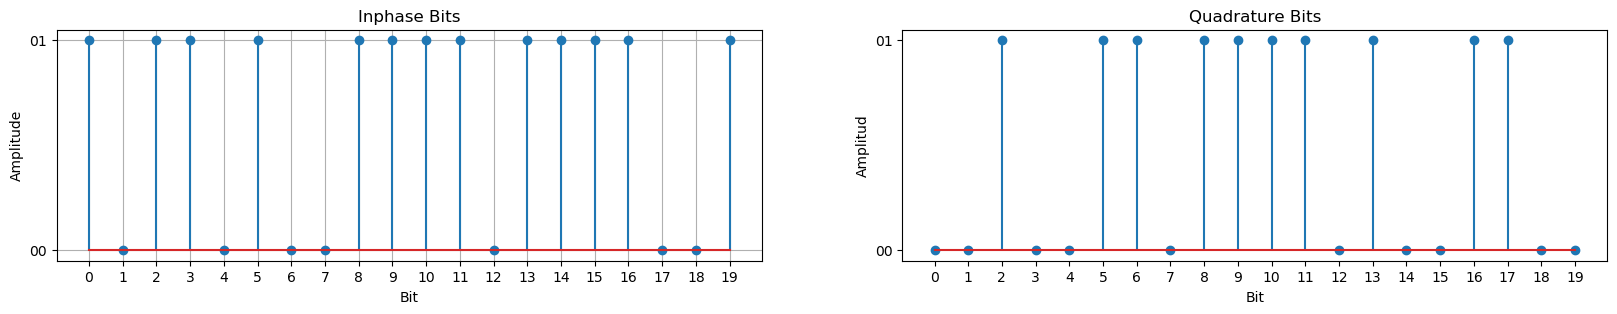

In [4]:
from matplotlib.ticker import StrMethodFormatter

bits = np.random.randint(0, 2, N)  # [0,1] bits aleatorios

i_bits = bits[0::2]  # bits pares
q_bits = bits[1::2]  # bits impares

fig, (ax_i, ax_q) = plt.subplots(1, 2, figsize=(20, 3))
ax_i.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax_i.yaxis.set_ticks(np.arange(0, 11, 1))
ax_i.xaxis.set_ticks(np.arange(0, len(i_bits), 1))
ax_i.set_title("Inphase Bits")
ax_i.grid(True)
ax_i.set_xlabel("Bit")
ax_i.set_ylabel("Amplitude")
ax_i.stem(i_bits[0:20], use_line_collection=True)

ax_q.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax_q.yaxis.set_ticks(np.arange(0, 11, 1))
ax_q.xaxis.set_ticks(np.arange(0, len(q_bits), 1))
ax_q.set_title("Quadrature Bits")
ax_q.set_xlabel("Bit")
ax_q.set_ylabel("Amplitud")
ax_q.stem(q_bits[0:20], use_line_collection=True)
plt.show()

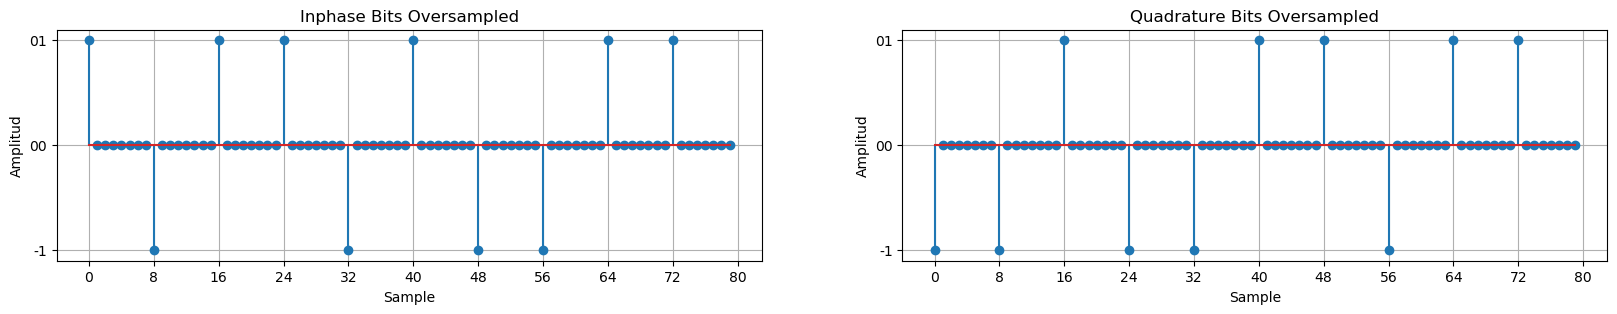

In [5]:

osample_i = np.array([])
for index, bit in enumerate(i_bits):
    pulse = np.zeros(sps)  # "relleno" un array de 8 bits con 0
    pulse[0] = bit*2 - 1
    # concateno el array de 8 bits con el array de bits
    osample_i = np.concatenate((osample_i, pulse))

osample_q = np.array([])
for bit in q_bits:
    pulse = np.zeros(sps)  # "relleno" un array de 8 bits con 0
    pulse[0] = bit*2 - 1
    # concateno el array de 8 bits con el array de bits
    osample_q = np.concatenate((osample_q, pulse))

fig, (ax_i, ax_q) = plt.subplots(1, 2, figsize=(20, 3))
ax_i.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax_i.yaxis.set_ticks(np.arange(-11, 11, 1))
ax_i.xaxis.set_ticks(np.arange(0, len(osample_i), 8))
ax_i.set_title("Inphase Bits Oversampled")
ax_i.grid(True)
ax_i.set_xlabel("Sample")
ax_i.set_ylabel("Amplitud")
ax_i.stem(osample_i[0:80], use_line_collection=True)

ax_q.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax_q.yaxis.set_ticks(np.arange(-11, 11, 1))
ax_q.xaxis.set_ticks(np.arange(0, len(osample_q), 8))
ax_q.set_title("Quadrature Bits Oversampled")
ax_q.set_xlabel("Sample")
ax_q.set_ylabel("Amplitud")
ax_q.stem(osample_q[0:80], use_line_collection=True)
ax_q.grid(True)
plt.show()

# Root Raised-Cosine Filter

![rrcfilter](https://github.com/sofia-am/digital_communications/blob/master/img/raised-cosine-pulse.png?raw=true) 

Es un filtro pasa bajo muy utilizado para limitar el ancho de banda que nuestra señal va a ocupar. También tiene la propiedad de valer 0 en intervalos de T. El filtrado se realiza parcialmente en el transmisor, para limitar el ancho de banda, y parcialmente en el receptor, para limitar la interferencia. 

La **raiz cuadrada** del filtro proviene del dominio de la frecuencia, de esta manera tomamos la raiz cuadrada de la respuesta en frecuencia del filtro coseno realzado para obtener el filtro *parcial* que necesitamos. 

### Factor de Roll-Off
El parámetro $\beta$ toma valores entre 0 y 1 y determina cuán rapido, en el dominio del tiempo, el filtro decae a 0. Mientras más bajo sea el roll-off, más compacta es nuestra señal en frecuencia.

### Parámetros

La función `rrcosfilter` toma como parámetros:

- `N`: span o tamaño del filtro en samples
- `alpha`: factor de roll-off entre [0,1]
- `Ts`: periodo de muestreo en segundos
- `Fs`: frecuencia de muestreo en Hz

En la siguiente imagen se pueden observar los diferentes comportamientos del filtro de acuerdo al cambio de algunos de estos parámetros

![filterresponse](https://github.com/sofia-am/digital_communications/blob/master/img/srrcDesign_impulseResponse-1.png?raw=true)

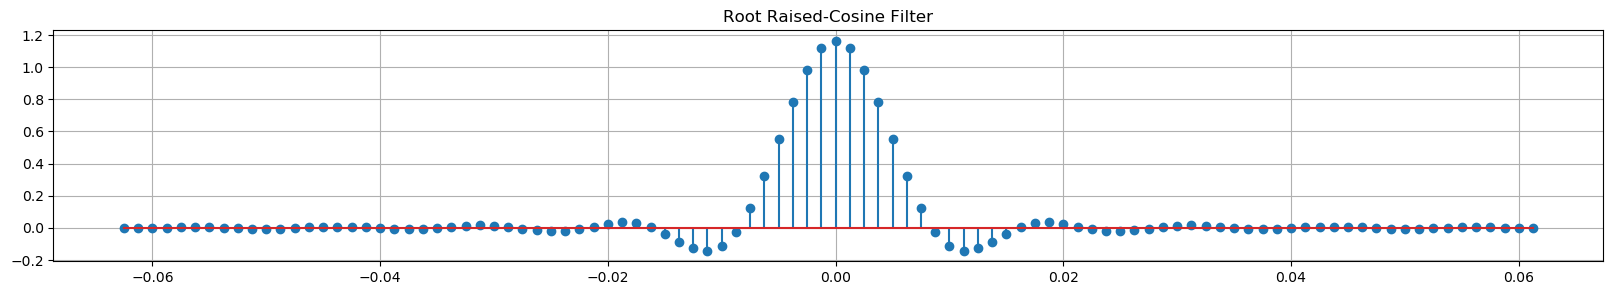

In [6]:
from commpy.filters import rrcosfilter

length = 100
beta = 0.6
Tsym = sps*sampling_period

time, filter_response = rrcosfilter(length, beta, Tsym, sample_rate)
# time:  Array containing the time indices, in seconds, for the impulse response.
# filter_response:  Array containing the impulse response values.

plt.figure(figsize=(20, 3))
plt.stem(time, filter_response, use_line_collection=True)
plt.title("Root Raised-Cosine Filter")
plt.grid(True)
plt.show()

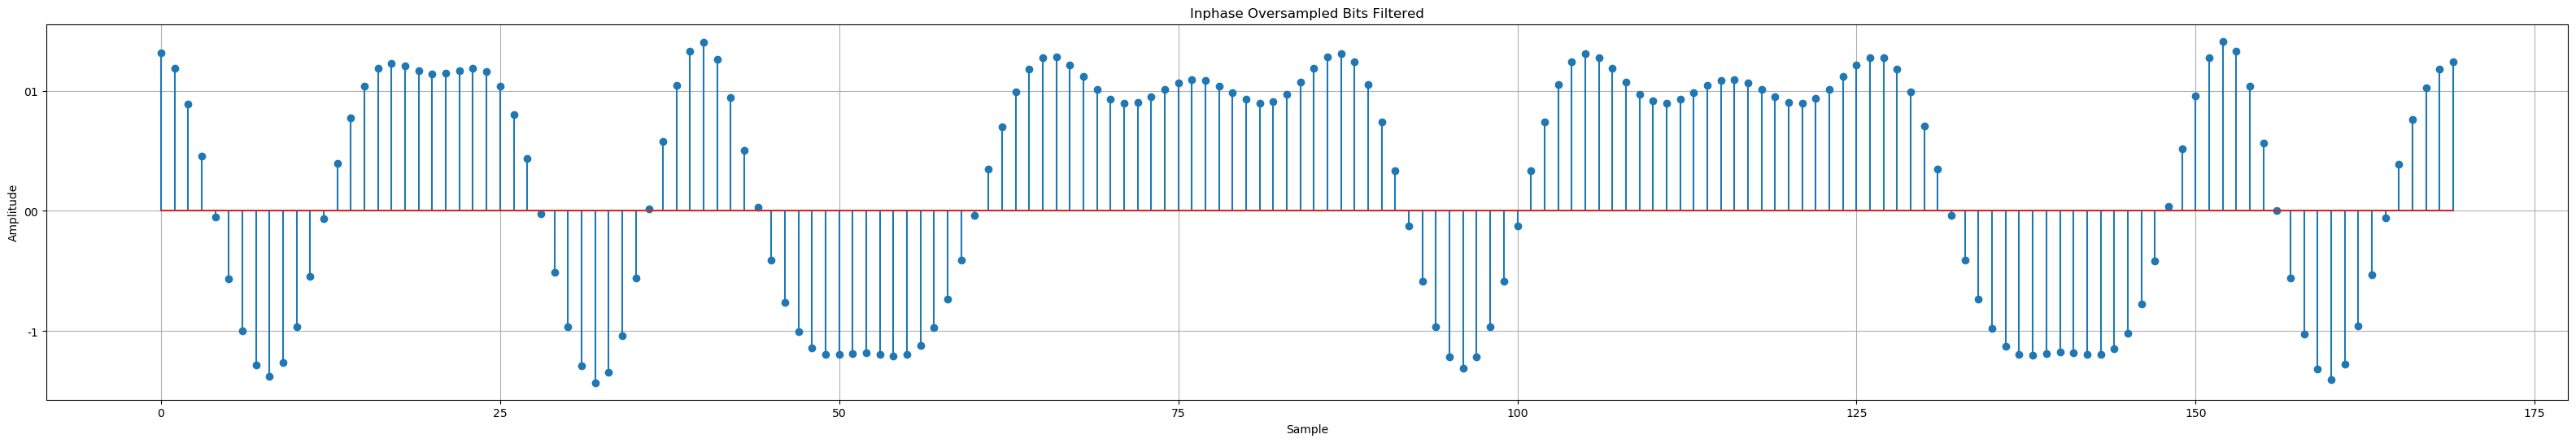

In [7]:
i_filtered = np.convolve(osample_i, filter_response)
delay = int(length/2)
i_filtered = i_filtered[delay:]  # elimino el comportamiento transitorio

fig, ax = plt.subplots(figsize=(40, 6))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax.yaxis.set_ticks(np.arange(-11, 11, 1))
ax.set_title("Inphase Oversampled Bits Filtered")
ax.grid(True)
ax.set_xlabel("Sample")
ax.set_ylabel("Amplitude")
ax.stem(i_filtered[0:170], use_line_collection=True)
plt.show()

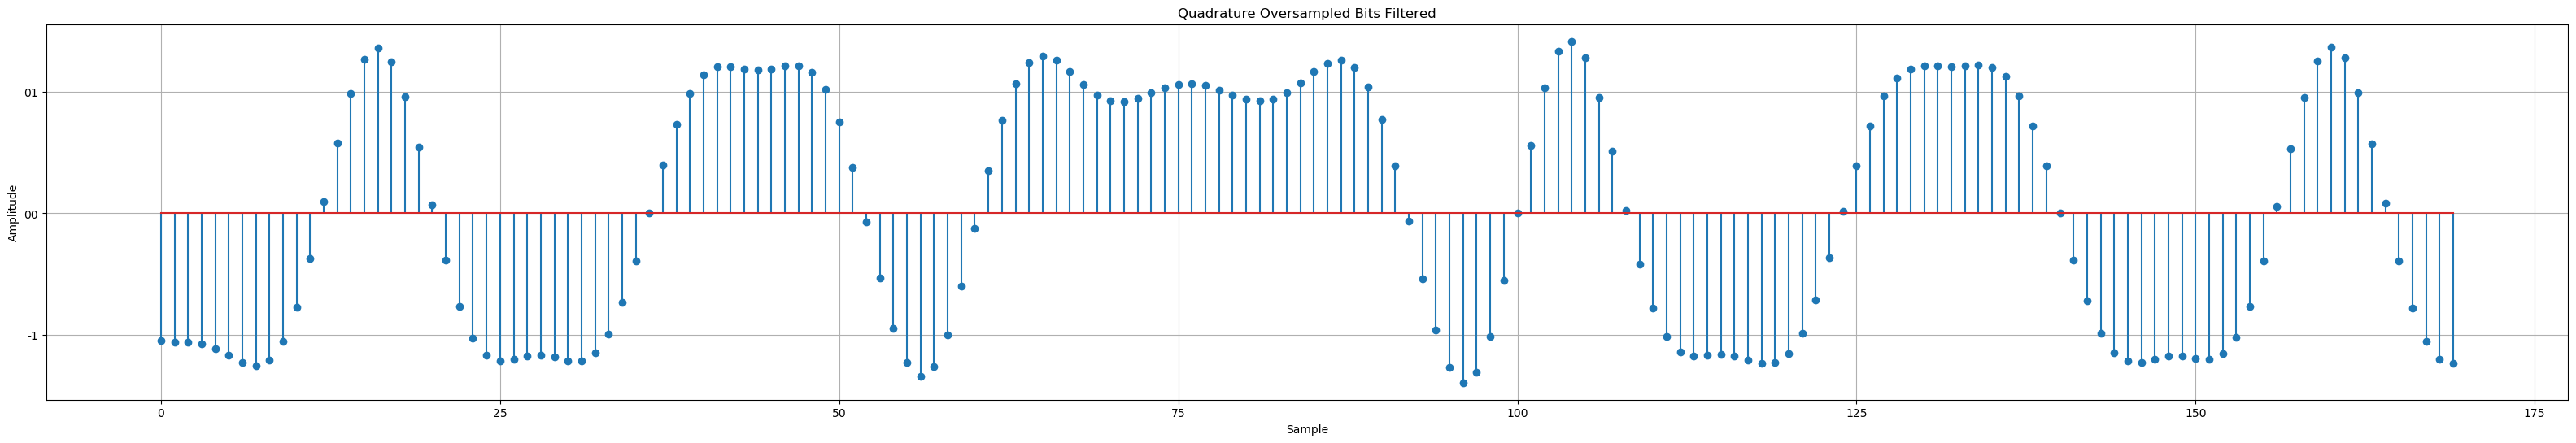

In [8]:
q_filtered = np.convolve(osample_q, filter_response)
q_filtered = q_filtered[delay:]

fig, ax = plt.subplots(figsize=(40, 6))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax.yaxis.set_ticks(np.arange(-11, 11, 1))
ax.set_title("Quadrature Oversampled Bits Filtered")
ax.grid(True)
ax.set_xlabel("Sample")
ax.set_ylabel("Amplitude")
ax.stem(q_filtered[0:170], use_line_collection=True)
plt.show()

# Modulación 

En el siguiente bloque se generan las dos señales portadoras. Son ortogonales entre sí ya que se encuentran defasadas 90°.
Las ondas portadoras son representadas con las siguientes funciones:

$\phi_1(t) = \sqrt{\frac{2}{T_s}} sen(2\pi f_c t)$

$\phi_2(t) = \sqrt{\frac{2}{T_s}} cos(2\pi f_c t)$

donde $T_s$ es el periodo de símbolo y $f_c$ la frecuencia de la portadora.

i_filtered size:  16049 
t size:  16049
Sample time:  0.01 
Amplitud:  14.142135623730951


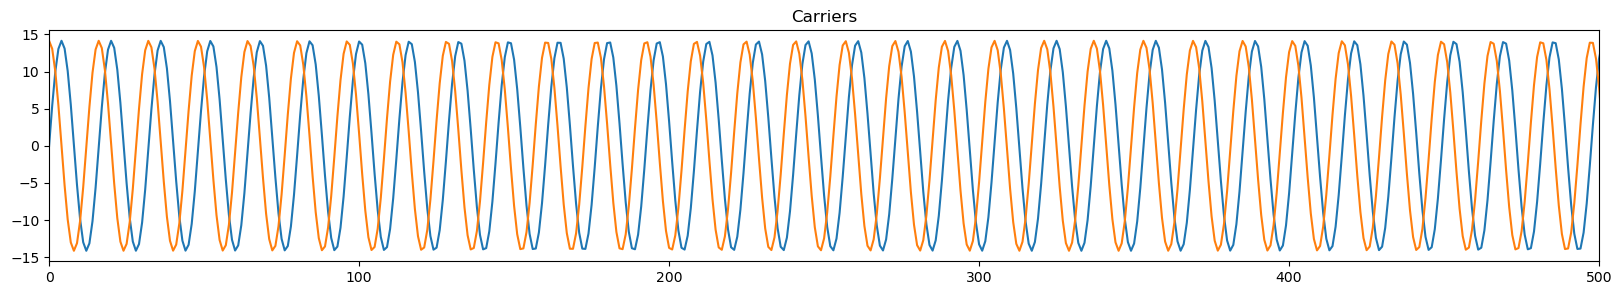

In [9]:
Fc = 1e3  # [Hz] carrier frequency
#t = np.arange(0, len(i_filtered))/len(i_filtered)
t = np.linspace(0, 1, len(i_filtered))
print("i_filtered size: ", len(i_filtered), "\nt size: ", len(t))

i_carrier = np.sqrt(2/symbol_period)*np.sin((2.0*np.pi*Fc*t))
q_carrier = np.sqrt(2/symbol_period)*np.cos((2.0*np.pi*Fc*t))
#print("time: ", t)
#print("\ni_Carrier: ", i_carrier)
print("Sample time: ", symbol_period, "\nAmplitud: ", np.sqrt(2/symbol_period))

plt.figure(figsize=(20, 3))
plt.plot(i_carrier)
plt.plot(q_carrier)
plt.xlim(0, 500)
plt.title("Carriers")
plt.show()

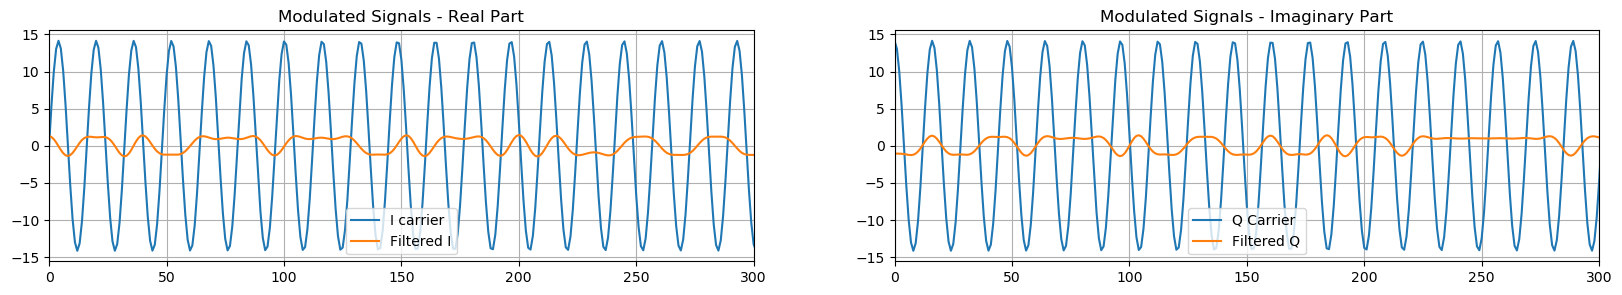

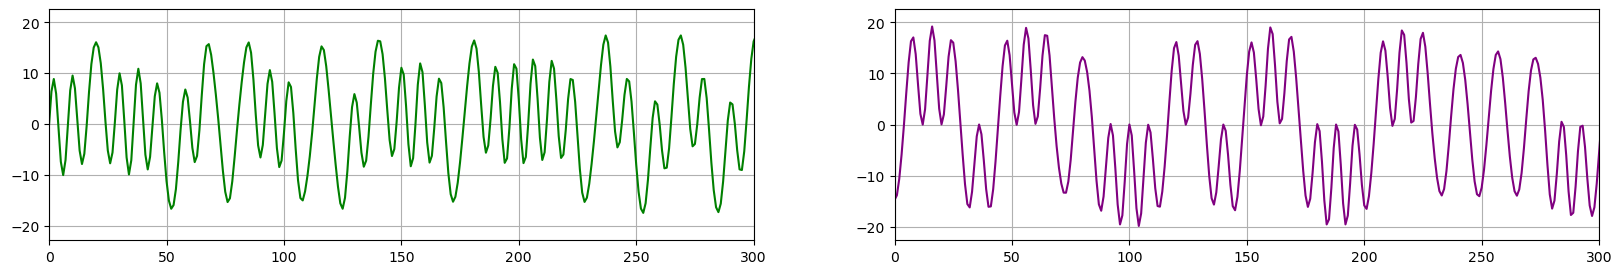

In [10]:
q_modulated = q_filtered * q_carrier
i_modulated = i_filtered * i_carrier

#print("q_filtered size:", len(q_filtered), "q_carrier size:", len(q_carrier))
#print("\n t size:", len(t))

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(i_carrier, label="I carrier")
plt.plot(i_filtered, label="Filtered I")
plt.xlim(0, 300)
plt.title("Modulated Signals - Real Part")
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(q_carrier, label="Q Carrier")
plt.plot(q_filtered, label="Filtered Q")
plt.xlim(0, 300)
plt.title("Modulated Signals - Imaginary Part")
plt.grid(True)
plt.legend()
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(i_modulated,color="green", label="Modulated I")
plt.xlim(0, 300)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(q_modulated, color="purple", label="Modulated Q")
plt.xlim(0, 300)
plt.grid(True)
plt.show()


# Ruido aditivo blanco Gaussiano
Es el modelo básico de ruido que se utiliza en comunicaciones para modelar el efecto de muchos procesos aleatorios que ocurren en la naturaleza.

- Aditivo: porque se agrega a cualquier ruido que pueda ser intrínseco al sistema.
- Blanco: se refiere a la idea de que tiene una potencia uniforme a lo largo de la banda de frecuencia del sistema de información. Es una analogía al color blanco el cual tiene emisiones uniformes a todas las frecuencias en el espectro visible.
- Gaussiano: porque tiene una distribución normal en el dominio del tiempo con una media de cero.

El canal AWGN está representado por una serie de salidas $Y_i$ cuyo evento de tiempo discreto es de índice $i$. $Y_i$ es la suma de todas las entradas $X_i$ y ruido $Z_i$, el cual es intependiente y distribuido de manera idéntica, y es tomado de una distribucion normal con media 0 y varianza N(el ruido). Se asume que los valores $Z_i$ no tienen correlación con los $X_i$.

$Z_i \sim \mathcal{N}(0, N)$

$Y_i = X_i + Z_i$

### Parámetros

La función `awgn` toma como parámetros:

- `s`: el vector con la señal.
- `SNRdB`: relación señal/ruido deseada (expresada en dB) para la señal recibida.
- `L`: oversampling factor, por default en 1.

Dicha función retorna: un vector con los valores de la señal con ruido, y otro vector con el ruido (que se imprime en pantalla para observar mejor cómo cambia la señal respecto al ruido)

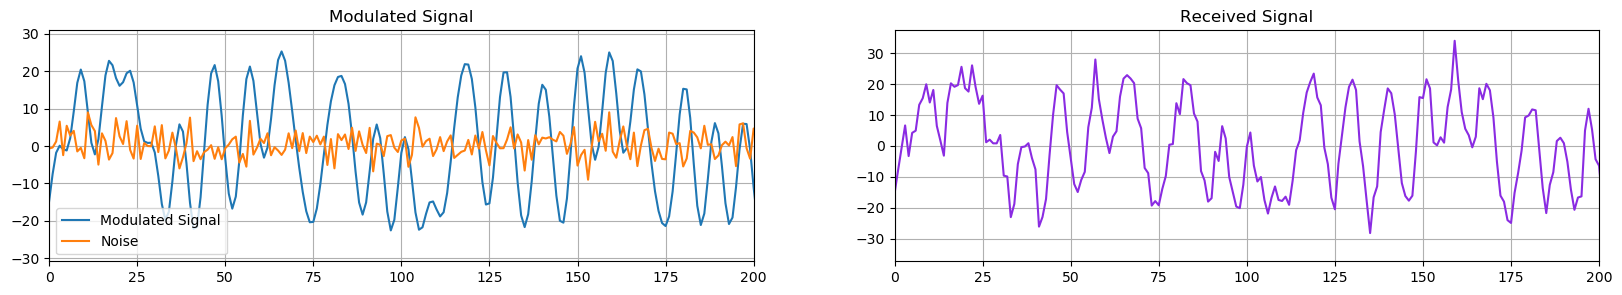

In [11]:
signal_modulated = i_modulated + q_modulated
#noise = np.random.randn(len(signal_modulated))
#noise = np.random.normal(0, 0.4, len(signal_modulated))
#signal_noise = signal_modulated + noise
SNRdb = 10 # [dB] A ratio higher than 1:1 (greater than 0 dB) indicates more signal than noise. 
signal_noise, noise = awgn(signal_modulated, SNRdb, 1)
t = np.arange(len(signal_modulated))

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(signal_modulated, label="Modulated Signal")
plt.plot(noise, label="Noise")
plt.xlim(0, 200)
plt.title("Modulated Signal")
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(signal_noise, "blueviolet", label="Modulated Signal + Noise")
plt.xlim(0, 200)
plt.title("Received Signal")
plt.grid(True)
plt.show()


# Receptor



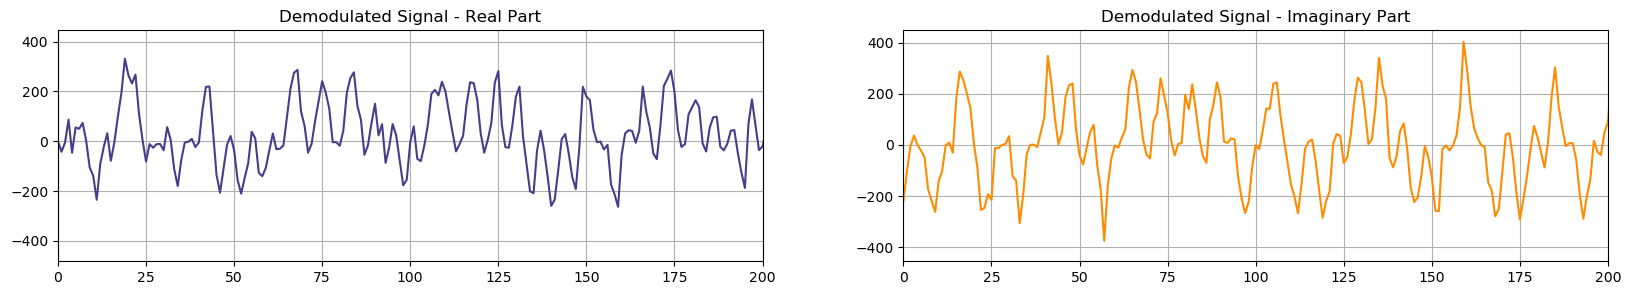

In [12]:
demodulated_i = signal_noise * i_carrier
demodulated_q = signal_noise * q_carrier

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(demodulated_i, "darkslateblue")
plt.xlim(0, 200)
plt.grid(True)
#plt.ylim(-2, 2)
plt.title("Demodulated Signal - Real Part")
plt.subplot(1, 2, 2)
plt.plot(demodulated_q, "darkorange")
plt.xlim(0, 200)
plt.grid(True)
#plt.ylim(-2, 2)
plt.title("Demodulated Signal - Imaginary Part")
plt.show()


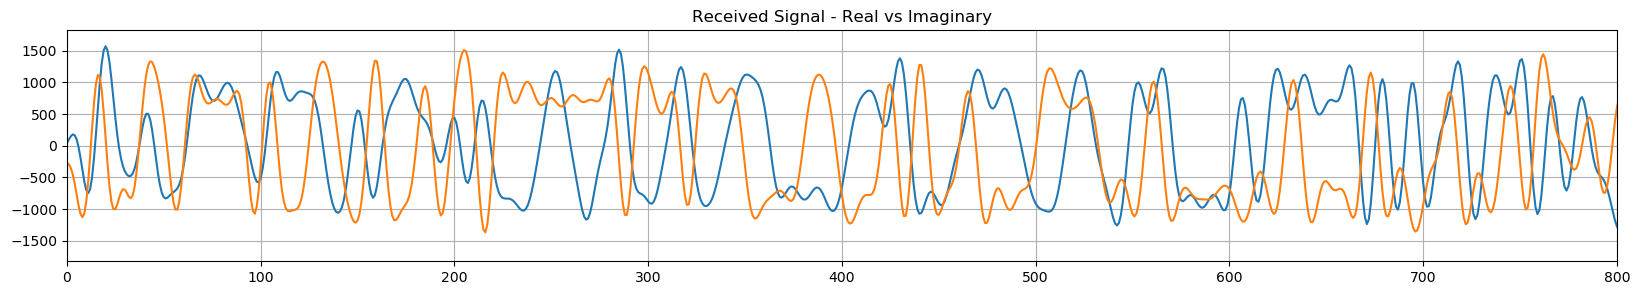

In [13]:
q_filtered_r = np.convolve(demodulated_q, filter_response)
q_filtered_r = q_filtered_r[delay:]
i_filtered_r = np.convolve(demodulated_i, filter_response)
i_filtered_r = i_filtered_r[delay:]
t = np.arange(len(i_filtered_r))

plt.figure(figsize=(20, 3))
plt.plot(t, i_filtered_r, q_filtered_r)
plt.xlim(0, 800)
plt.title("Received Signal - Real vs Imaginary")
plt.grid(True)
plt.show()

# Signal Quality 

### Eye Diagram
Se genera al superponer distintas combinaciones de unos y ceros. Se pueden observar cosas como:
- Periodo del bit: período entre la apertura y cierre del ojo. Se obtiene a partir del cruce de amplitud y el cruce de tiempo.
- Jitter: corresponde básicamente a una desviación de fase respecto de la posición ideal en el tiempo de una señal digital que se propaga en un canal de transmisión
- Cruce de amplitud: se refiere al nivel de voltaje en el cual se produce la apertura del ojo y su posterior cierre.
- Cruce de tiempo: se refiere al tiempo en el que se produce la apertura del ojo y su posterior cierre.

### Constellation
Es un método de representación en el plano complejo de los estados de símbolo en términos de amplitud y fase en los esquemas de modulación digital tales como QAM o PSK. Típicamente, el eje horizontal se refiere a los componentes de los símbolos que están en fase con la señal portadora y el eje vertical a los componentes en cuadratura (90°). Los diagramas de constelación también pueden usarse para reconocer el tipo de interferencia y distorsión en una señal. 


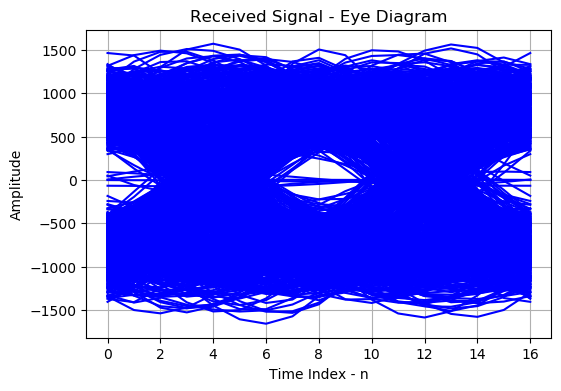

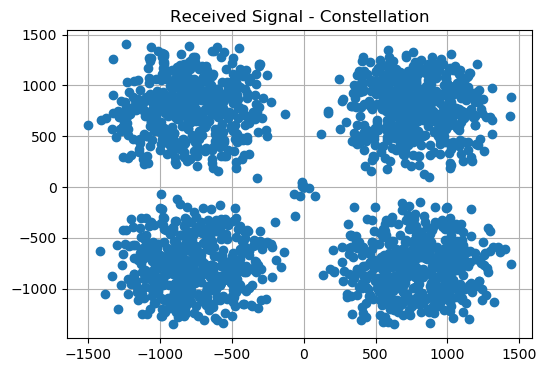

In [22]:
# --------------------- Diagrama de Ojo ---------------------#
from sk_dsp_comm import digitalcom as dc
length_eye = sps*2      # display length in samples (usually two symbols)
start = 0               # start index

dc.eye_plot(i_filtered_r, length_eye, start)
plt.title("Received Signal - Eye Diagram")
#dc.eye_plot(q_filtered_r, length_eye, start)
#plt.title("Diagrama de ojo - Señal Imaginaria")
plt.show()

# ----------------------  Constelación ---------------------#
time_offset = 1

i_sampled =i_filtered_r
i_sampled = i_sampled[time_offset:]
i_sampled = i_sampled[sps::sps]
q_sampled = q_filtered_r
q_sampled = q_sampled[time_offset:]
q_sampled = q_sampled[sps::sps]

# Los simbolos que se observan en la coordenada 0,0 en la constelación ocurren a causa de un offset respecto al tiempo
# esto se soluciona con técnicas de sincronización, pero no se implementan en este ejemplo porque son algoritmos mas complejos.
# Para visualizar este fenómeno, se puede modificar el parámetro time_offset y observar como cambia la constelación.

plt.figure(figsize=(6, 4))
plt.plot(i_sampled, q_sampled, 'o')
plt.title("Received Signal - Constellation")
plt.grid(True)
plt.show()

# Estimación

![fasoresqpsk](https://github.com/sofia-am/digital_communications/blob/master/img/fasoresqpsk.png?raw=true)

In [17]:
phase_vector = np.array([])
estimated_q = np.array([])
estimated_i = np.array([])

#---------------- Estimación del Símbolo -------------------#
for i in range(0, len(i_filtered_r), sps):  # range(start, stop, step):
    phase = int(np.arctan2(q_filtered_r[i], i_filtered_r[i])*180/np.pi)
    # print(phase)
    phase_vector = np.append(phase_vector, phase)

    if phase in range (0, 90):
        estimated_q = np.append(estimated_q, 1)
        estimated_i = np.append(estimated_i, 1)
    elif phase in range (90, 180):
        estimated_q = np.append(estimated_q, 1)
        estimated_i = np.append(estimated_i, 0)
    elif phase in range (-180, -90):
        estimated_q = np.append(estimated_q, 0)
        estimated_i = np.append(estimated_i, 0)
    elif phase in range (-90, 0):
        estimated_q = np.append(estimated_q, 0)
        estimated_i = np.append(estimated_i, 1)

symbol_error = 0
bit_error = 0
#----------------- Comparacion de Bits Recibidos vs Bits Transmitidos -------------------#
for i in range(0, len(i_bits)):
    #print("Bit: ", i, " - ", estimated_i[i], estimated_q[i], estimated_c[i])
    sym_error_aux = 0
    if i_bits[i] != estimated_i[i]:
        bit_error += 1
        sym_error_aux += 1
    if q_bits[i] != estimated_q[i]:
        bit_error += 1
        sym_error_aux += 1
    
    if sym_error_aux > 0:
        symbol_error += 1

BER = (bit_error/N)*100
SER = (symbol_error/Nsym)*100

print("Bits transmitidos: ", N)
print("Bits errados: ", bit_error)
print("BER: {:.2f}%".format(BER))
print("\nSimbolos transmitidos: ", Nsym)
print("Simbolos errados: ", symbol_error)
print("SER: {:.2f}%".format(SER))


Bits transmitidos:  4000
Bits errados:  0
BER: 0.00%

Simbolos transmitidos:  2000
Simbolos errados:  0
SER: 0.00%


### Referencias
- https://es.wikipedia.org/wiki/Diagrama_de_constelaci%C3%B3n
- https://www.edn.com/eye-diagram-basics-reading-and-applying-eye-diagrams/
- https://pysdr.org/index.html
- https://greenteapress.com/thinkdsp/html/
- https://www.gaussianwaves.com/2015/06/how-to-generate-awgn-noise-in-matlaboctave-without-using-in-built-awgn-function/